# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

#boston = load_boston()

data_url = "data/boston.txt"
boston = pd.read_csv(data_url)
#since load_boston() is deprecated, curated the data outside form 
# "http://lib.stat.cmu.edu/datasets/boston" and loaded it directly.
# MDEV is target

#data_url = "http://lib.stat.cmu.edu/datasets/boston"
#raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
#data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
#target = raw_df.values[1::2, 2]

#print(data)
#print(target)
#print(raw_df)
print(boston.head(10))

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7

In [3]:
boston.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [4]:
boston.shape

(498, 14)

In [5]:
# Print column names
#print(boston.feature_names)
# this is the same as keys()

In [6]:
# Print description of Boston housing data set
#print(boston.DESCR)
#stripped out the description of the dataset externally
#It would have printed this

# The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
# prices and the demand for clean air', J. Environ. Economics & Management,
# vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
# ...', Wiley, 1980.   N.B. Various transformations are used in the table on
# pages 244-261 of the latter.

# Variables in order:
# CRIM     per capita crime rate by town
# ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS    proportion of non-retail business acres per town
# CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX      nitric oxides concentration (parts per 10 million)
# RM       average number of rooms per dwelling
# AGE      proportion of owner-occupied units built prior to 1940
# DIS      weighted distances to five Boston employment centres
# RAD      index of accessibility to radial highways
# TAX      full-value property-tax rate per $10,000
# PTRATIO  pupil-teacher ratio by town
# B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT    % lower status of the population
# MEDV     Median value of owner-occupied homes in $1000's

# changed MEDV to PRICE in the dataset- could have renamed the column here as well!

Now let's explore the data set itself. 

In [7]:
#bos = pd.DataFrame(boston.data)
#bos.head()
bos = boston
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


There are no column names in the DataFrame. Let's add those. 

In [8]:
#bos.columns = boston.feature_names
#bos.head()

Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
#print(boston.target.shape)

In [10]:
#bos['PRICE'] = boston.target
#bos.head()

## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,498.000000,498.000000,498.00000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,1.638544,11.546185,11.02492,0.070281,0.552857,6.287428,68.234538,3.822029,9.317269,404.096386,18.427510,362.330904,12.546104,22.696185
std,2.583373,23.464449,6.85777,0.255877,0.115657,0.706065,28.218223,2.111110,8.580296,166.659277,2.170867,80.253958,7.120781,9.173964
min,0.006320,0.000000,0.46000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,10.480000,1.730000,5.000000
25%,0.079870,0.000000,5.13000,0.000000,0.448250,5.885500,43.875000,2.107650,4.000000,279.000000,17.075000,376.247500,6.905000,17.225000
50%,0.236060,0.000000,8.56000,0.000000,0.535000,6.210000,76.800000,3.272100,5.000000,330.000000,18.950000,391.770000,11.265000,21.400000
75%,2.153583,12.500000,18.10000,0.000000,0.624000,6.623500,93.900000,5.214600,8.000000,666.000000,20.200000,396.270000,16.570000,25.000000
max,9.966540,100.000000,27.74000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

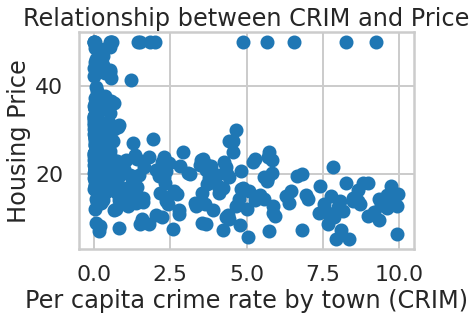

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In [13]:
# your turn: describe relationship
# As the CRIM increases, housing price decreases
# It feels like the relationship is negative
# Also, it feels like there is a logarithmic relationship between PRICE and CRIM
# There are some outliars where CRIM is high and price is also high.  But they are very few

Text(0.5, 1.0, 'Relationship between RM and Price')

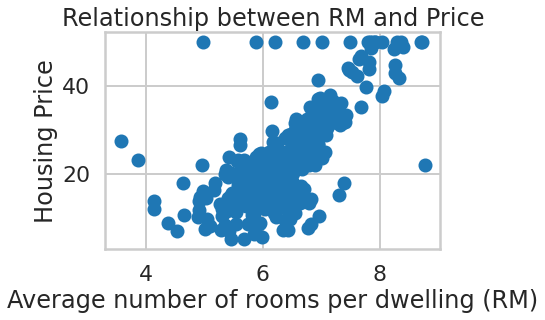

In [14]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price") 


Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

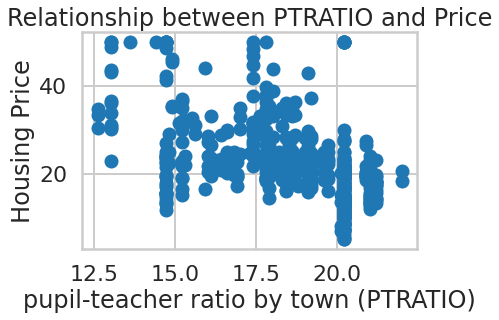

In [15]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("pupil-teacher ratio by town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

Text(0.5, 1.0, 'Relationship between NOX and Price')

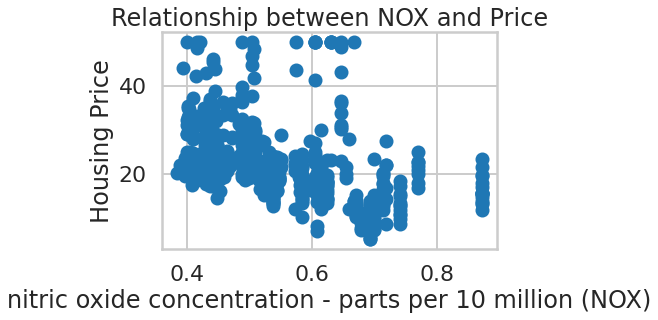

In [16]:
# your turn: create some other scatter plots
# scatter plot between *NOX* and *PRICE*
plt.scatter(bos.NOX, bos.PRICE)
plt.xlabel("nitric oxide concentration - parts per 10 million (NOX)")
plt.ylabel("Housing Price")
plt.title("Relationship between NOX and Price")

Text(0.5, 1.0, 'Relationship between AGE and Price')

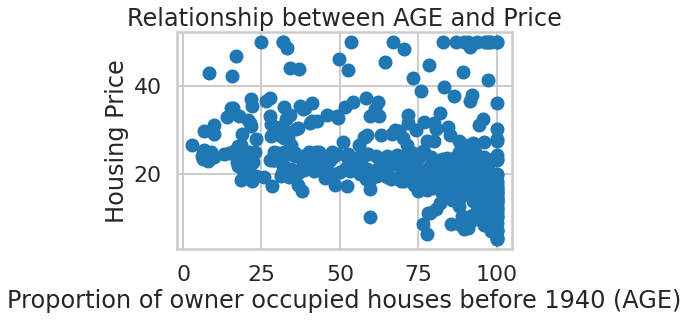

In [17]:
# scatter plot between *AGE* and *PRICE*
plt.scatter(bos.AGE, bos.PRICE)
plt.xlabel("Proportion of owner occupied houses before 1940 (AGE)")
plt.ylabel("Housing Price")
plt.title("Relationship between AGE and Price")

Text(0.5, 1.0, 'Relationship between DIS and Price')

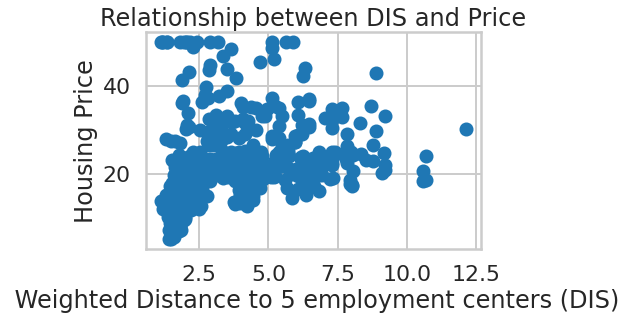

In [18]:
# scatter plot between *DIS* and *PRICE*
plt.scatter(bos.DIS, bos.PRICE)
plt.xlabel(" Weighted Distance to 5 employment centers (DIS)")
plt.ylabel("Housing Price")
plt.title("Relationship between DIS and Price")

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

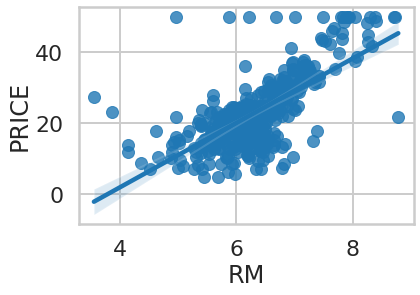

In [19]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)


### Histograms
***


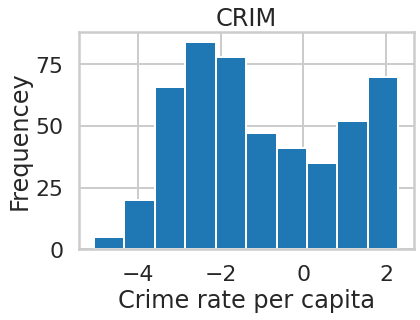

In [20]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

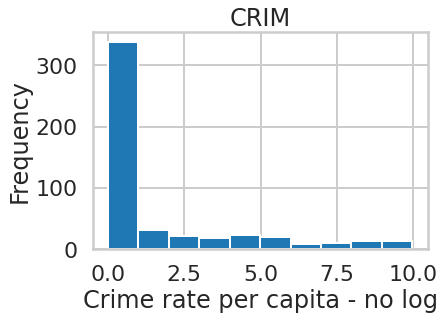

In [21]:
#your turn
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita - no log")
plt.ylabel("Frequency")
plt.show()
#This shows the distribution of data with 0 or close to 0 crime is very high 
# - but others are very log.  This will cause a lot of bias in the eventual model


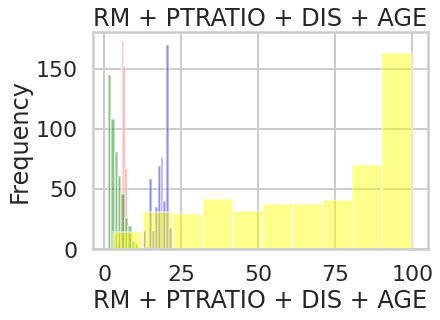

In [22]:
#histogram with two variables

plt.hist(bos.RM, alpha=0.45, color='red')
plt.hist(bos.PTRATIO, alpha=0.45, color='blue')
plt.hist(bos.DIS, alpha=0.45, color='green')
plt.hist(bos.AGE,  alpha=0.45, color='yellow')


plt.title("RM + PTRATIO + DIS + AGE")
plt.xlabel("RM + PTRATIO + DIS + AGE")
plt.ylabel("Frequency")
plt.show()
#sns.regplot(y="RM", x="DIS", data=bos, fit_reg = True)
# Change this to scatter plot
# Hmm.  I am not sure what to derive in terms of correlation from this 
#histogram.  The only thing I can tell is that the mean points for these
#histograms dont overlap.  Therefore
# there is less likely hood of these being correlated.
# I am not sure what to infer from these histograms



## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [23]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [24]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     475.8
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           1.83e-74
Time:                        18:22:35   Log-Likelihood:                -1642.4
No. Observations:                 498   AIC:                             3289.
Df Residuals:                     496   BIC:                             3297.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.4675      2.637    -13.071      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

22.69618473895582
22.69618473895585
0      25.310716
1      23.910589
2      30.856676
3      29.156521
4      30.511190
         ...    
493    25.474368
494    21.173976
495    28.956503
496    27.301807
497    20.355720
Length: 498, dtype: float64 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
493    22.4
494    20.6
495    23.9
496    22.0
497    11.9
Name: PRICE, Length: 498, dtype: float64


Text(0.5, 1.0, 'Relationship between FittedValues and Price')

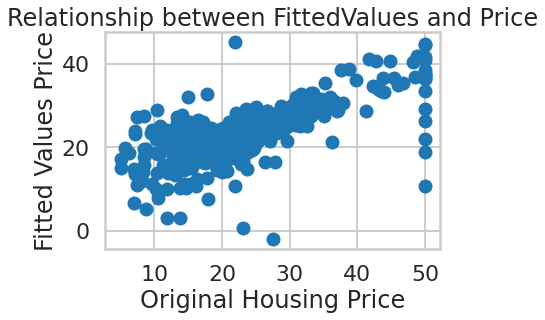

In [25]:
# your turn
# scatter plot between *m.fittedvalues* and *PRICE*
print(m.fittedvalues.mean())
print(bos.PRICE.mean())
print(m.fittedvalues, bos.PRICE)
plt.scatter( bos.PRICE, m.fittedvalues)
plt.xlabel("Original Housing Price")
plt.ylabel("Fitted Values Price")
plt.title("Relationship between FittedValues and Price")

#It almost feels like the difference between the fitted values and real values is quite a bit 
#particularly in the middle portion of the range - approx 10-35

### Fitting Linear Regression using `sklearn`


In [26]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

0.625143450702791
Coeff = {} [8.46737413]
Intecept = {} -30.494920587519864


Text(0.5, 1.0, 'Relationship between Price and prediction')

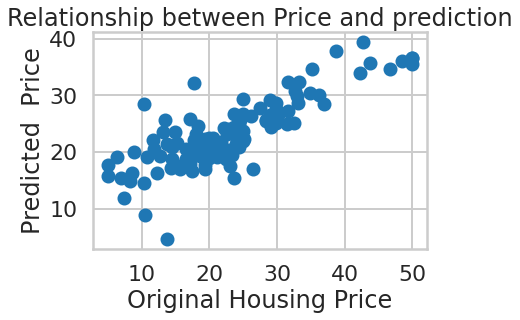

In [27]:
# Look inside lm object
from sklearn.model_selection import train_test_split
#add the seed
X_train, X_test, y_train, y_test = train_test_split(bos[['RM']], 
                                                    bos.PRICE, test_size = 0.25)
lm.fit(X_train, y_train)
print(lm.score(X_test, y_test))
y_pred = lm.predict(X_test)

print('Coeff = {}', lm.coef_)
print('Intecept = {}', lm.intercept_)

plt.scatter( y_test, y_pred)
plt.xlabel("Original Housing Price")
plt.ylabel("Predicted  Price")
plt.title("Relationship between Price and prediction")

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [28]:
# Use all 13 predictors to fit linear regression model
bos_rest = bos.drop('PRICE', 1)
X = bos_rest
lm.fit(X, bos.PRICE)
print('Coeff = {}', lm.coef_)
print('Intecept = {}', lm.intercept_)

Coeff = {} [-9.47738655e-02  4.32246951e-02  3.07292030e-02  2.81990771e+00
 -1.70479089e+01  3.81819288e+00  1.91174991e-03 -1.40605605e+00
  2.70407819e-01 -1.21763601e-02 -9.45847394e-01  9.58941252e-03
 -5.55932119e-01]
Intecept = {} 35.80821847547632


/tmp/ipykernel_8506/3565999703.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bos_rest = bos.drop('PRICE', 1)


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [29]:
# your turn
# Exercise 1:
# There is a fit_intercept = false parameter to fit in LinearRegression model.  I can use it
# From what the article says, it depends on the model application.  It might be ambiguious to
# have an intercept in some cases.  For example, if a model is created for weight to height
# prediction, weight of 0 might be ambiguous if height is intercept.  

lm_temp = LinearRegression(fit_intercept=False)
lm_temp.fit(X_train, y_train)

print('Coeff = {}', lm_temp.coef_)
print('Intercept = {}', lm_temp.intercept_)

# Exercise 2:
# It is not enough that the residuals are normally distributed.  There are other aspects like residuals
# having correlated patterns.  One of the patterns is serially correlated residuals.  This will cause the 
# i.i.d assumptions to break.

#Exercise 3:
# False.  In the case of linear regression, it is expected that residuals are normally distributed.  
# This allows the regression line to be fitted to the data such that mean of the residuals is zero.

Coeff = {} [3.66993431]
Intercept = {} 0.0


### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [30]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 35.80821847547632


In [31]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [32]:
# The coefficients
features_coeff = pd.DataFrame({'features': bos_rest.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]
print(features_coeff)

   features  estimatedCoefficients
0      CRIM              -0.094774
1        ZN               0.043225
2     INDUS               0.030729
3      CHAS               2.819908
4       NOX             -17.047909
5        RM               3.818193
6       AGE               0.001912
7       DIS              -1.406056
8       RAD               0.270408
9       TAX              -0.012176
10  PTRATIO              -0.945847
11        B               0.009589
12    LSTAT              -0.555932


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [33]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.1956045 , 25.19372007, 30.8785764 , 28.91823164, 28.19281497])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

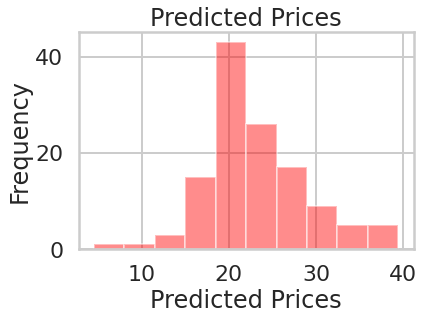

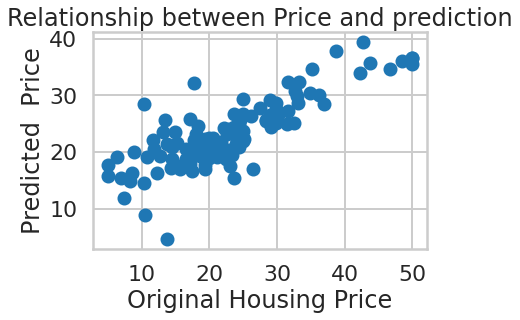

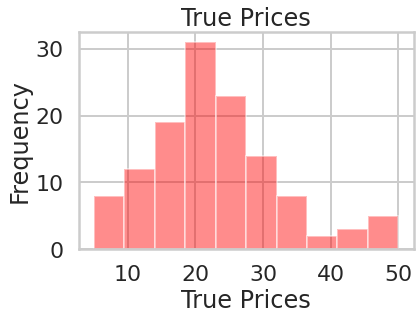

In [34]:
# your turn
#Exercise 1:
#print(y_pred)
plt.hist(y_pred, bins=10, alpha=0.45, color='red')

plt.title("Predicted Prices")
plt.xlabel("Predicted Prices")
plt.ylabel("Frequency")
plt.show()
# Observations: Looks like the range is roughtly from 5-40.  
# It does follow a normal distribution and the mean is around 20.  
# There are some outliars around high 40s, and near 0.  It could
# just be bad data near 0.  

#Exercise 2
plt.scatter( y_test, y_pred)
plt.xlabel("Original Housing Price")
plt.ylabel("Predicted  Price")
plt.title("Relationship between Price and prediction")
plt.show()

plt.hist(y_test, bins=10, alpha=0.45, color='red')

plt.title("True Prices")
plt.xlabel("True Prices")
plt.ylabel("Frequency")
plt.show()
# Looks like the mean has moved a bit to the left.  It probably means
# predicted prices are more optimistic vs real prices.
# In addition, the range of prediction is about 8 points around the median.

#Exercies 3
# It appears as if both statsmodel and scikit-learn are comparable in terms of features
# scikit-learn seems to be more oriented towards machine learning and statsmodel towards statisticians
# Based on the article at https://www.programsbuzz.com/article/difference-between-scikit-learn-and-statsmodels,
# following is the table of comparison
# Regularization
#    scikit-learn - L2 regularization by default
#    statsmodel - does not regulariza by default
# Hyperparameter tuning
#    scikit-learn - GridSearchCV allows easy tuning
#    statsmodel - needs to be coded
# Intercept
#    scikit-learn - includes intercept by default - parameter to turn off
#    statsmodel - use add constant method
# Model evaluation
#    scikit-learn - score method predicts model accuracy
#    statsmodel - summary method shows metrics
# When to use
#    scikit-learn - to do predictions
#    statsmode - statistical inference


### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [35]:
print(type(lm.predict(X)))
print(type(np.array(lm.predict(X))))

residuals = bos['PRICE'] - lm.predict(X)
print(residuals)

residual_sqr = residuals ** 2
print(residual_sqr)
np.sum(residual_sqr)

print(np.sum((bos['PRICE'] - lm.predict(X)) ** 2))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0      -6.195604
1      -3.593720
2       3.821424
3       4.481768
4       8.007185
         ...    
493    -1.287384
494    -1.941335
495    -4.016711
496    -4.402555
497   -10.666634
Name: PRICE, Length: 498, dtype: float64
0       38.385515
1       12.914824
2       14.603278
3       20.086248
4       64.115012
          ...    
493      1.657357
494      3.768780
495     16.133966
496     19.382487
497    113.777078
Name: PRICE, Length: 498, dtype: float64
11277.89537641455


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [36]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE))**2))

30550.42737458927


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSR = \frac{ESS}{K}$$

$$MSE = \frac{RSS}{N-K-1}$$

**Remember:** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [37]:
# your turn
#Exercise 1
print("======================================")
print("Exercise 1")
print("======================================")
lm.fit(bos[['PTRATIO']], bos.PRICE)
print(lm.coef_)
print(lm.intercept_)
#Since the coefficient is negative, slope is negative, 
# so looks like the house price is reducing as the pupil to teacher ratio increases
# intercept of 61 tells that the line intersects y axis at 61.
# It is the mean value of the response variable when there is no coefficient or 
# pupil to teacher ratio is 0.  So if this ratio is 0, the mean home price is 61

# Exercise 2
print("======================================")
print("Exercise 2")
print("======================================")
r_sqr = lm.score(np.array(bos.PTRATIO).reshape(-1,1), np.array(bos.PRICE).reshape(-1,1)) 
print('r-squared = ', r_sqr )
# This number tells us that there is not a great fit between PTRATIO and PRICE.  Since r-squared tells 
# us percentage of dependent variable variation that a linear model explains, in this case
# only 25% of PTRATIO variable variation can be explained by the model.  So it is not a great influencer
# for predictor.

#Exercise 3
print("======================================")
print("Exercise 3")
print("======================================")
RSS = np.sum((bos.PTRATIO - lm.predict(bos[['PTRATIO']] ** 2)))

ESS = np.sum((lm.predict(bos[['PTRATIO']]) - np.mean(bos.PRICE))**2)

print ("RSS = ", RSS, "ESS = ", ESS)
#DFR = N-K-1
DFR = len(bos) - 1 - 1
# F = (R^2/(1-R^2)(DFR/K)
F = (r_sqr/(1-r_sqr)) * (DFR/1)
print( "F = ", F)

#I am afraid that F value by itself does not tell us much until we get either p-value or
# F(critical).  If we get F(critical) where all coefficients are 0, and if F value is greater
# than the critical, then we can reject the null hypothesis and say that at PTRATIO does
# have some influence on the PRICE
          
#Exercise 4
print("======================================")
print("Exercise 4")
print("======================================")
print(lm.coef_)
#in the simple case, the t-statistic is slope of the line.  In this case it is -2.1183.  From what I understand
# F statistic should be a square of t-statistic.  But I dont see it here.  Check with DJ what I am doing wrong.

Exercise 1
[-2.11838542]
61.73275326165363
Exercise 2
r-squared =  0.2512824772561433
Exercise 3
RSS =  341630.34228256566 ESS =  10510.72456034178
F =  166.4661303268125
Exercise 4
[-2.11838542]


/home/vivek/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [38]:
# your turn
# create a new dataframe from subset of 

bos_crim_rm_ptratio = bos[['CRIM','RM','PTRATIO']]
#print(bos_crim_rm_ptratio )
X_trainmulti, X_testmulti, y_trainmulti, y_testmulti = train_test_split(np.array(bos_crim_rm_ptratio),
                                                    np.array(bos.PRICE).reshape(-1,1), test_size = 0.25)
lm.fit(X_trainmulti, y_trainmulti)

r_sqr = lm.score(X_testmulti, y_testmulti)
print (r_sqr)
#print(lm.predict(X_testmulti))

#Exercise 1
RSS = np.sum((np.array(X_testmulti) - lm.predict(np.array(X_testmulti)) ** 2))
ESS = np.sum((lm.predict(np.array(X_testmulti)) - np.mean(np.array(bos.PRICE).reshape(-1,1))**2))
print ("RSS = ", RSS, "ESS = ", ESS)
#DFR = N-K-1
DFR = len(bos) - 1 - 1
# F = (R^2/(1-R^2)(DFR/K)
F = (r_sqr/(1-r_sqr)) * (DFR/1)
print( "F = ", F)

#Exercise 2
print("R-Square = ",r_sqr)

#Exercise 3
print(lm.coef_)
#based on the way coefficients are generated, number of rooms has the biggest coefficient so it will influence
#the model significantly to predict house prices.

0.6682904640152462
RSS =  -206983.52935649175 ESS =  -61554.360264146446
F =  999.2841151446346
R-Square =  0.6682904640152462
[[-0.42803649  7.50944457 -1.00985528]]


## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [39]:
# create a new dataframe from subset of 

bos_crim_rm_ptratio_dis = bos[['CRIM','RM','PTRATIO','DIS']]
#print(bos_crim_rm_ptratio )
X_trainmulti, X_testmulti, y_trainmulti, y_testmulti = train_test_split(np.array(bos_crim_rm_ptratio_dis),
                                                    np.array(bos.PRICE).reshape(-1,1), test_size = 0.25)
lm.fit(X_trainmulti, y_trainmulti)

r_sqr = lm.score(X_testmulti, y_testmulti)
print (r_sqr)
#print(lm.predict(X_testmulti))

#Exercise 1
RSS = np.sum((np.array(X_testmulti) - lm.predict(np.array(X_testmulti)) ** 2))
ESS = np.sum((lm.predict(np.array(X_testmulti)) - np.mean(np.array(bos.PRICE).reshape(-1,1))**2))
print ("RSS = ", RSS, "ESS = ", ESS)
#DFR = N-K-1
DFR = len(bos) - 1 - 1
# F = (R^2/(1-R^2)(DFR/K)
F = (r_sqr/(1-r_sqr)) * (DFR/1)
print( "F = ", F)

#Exercise 2
print("R-Square = ",r_sqr)

#Exercise 3
print(lm.coef_)
#based on the way coefficients are generated, RM has the biggest coefficient therefore the highest slope. 
# Therefore for a unit change in RM,dependent variable will change the most.  


0.4798046290459582
RSS =  -273763.4404126124 ESS =  -61569.457200297555
F =  457.4879156850871
R-Square =  0.4798046290459582
[[-0.69602197  7.67381305 -1.05647731 -0.15218963]]



## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     166.5
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           4.81e-33
Time:                        18:22:36   Log-Likelihood:                -1737.8
No. Observations:                 498   AIC:                             3480.
Df Residuals:                     496   BIC:                             3488.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.7328      3.046     20.264      0.0

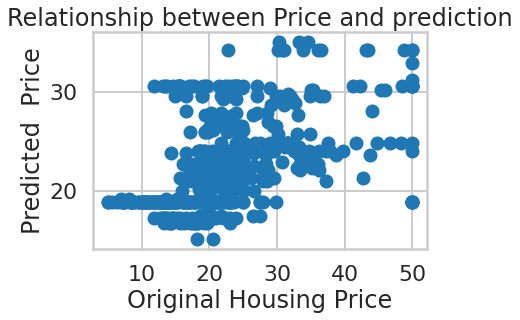

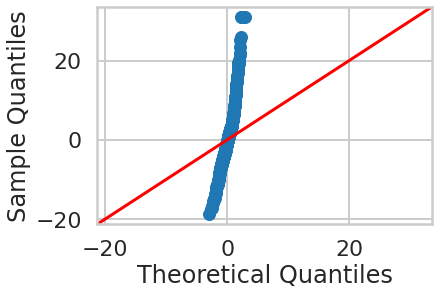

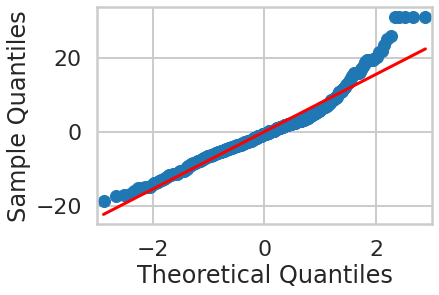

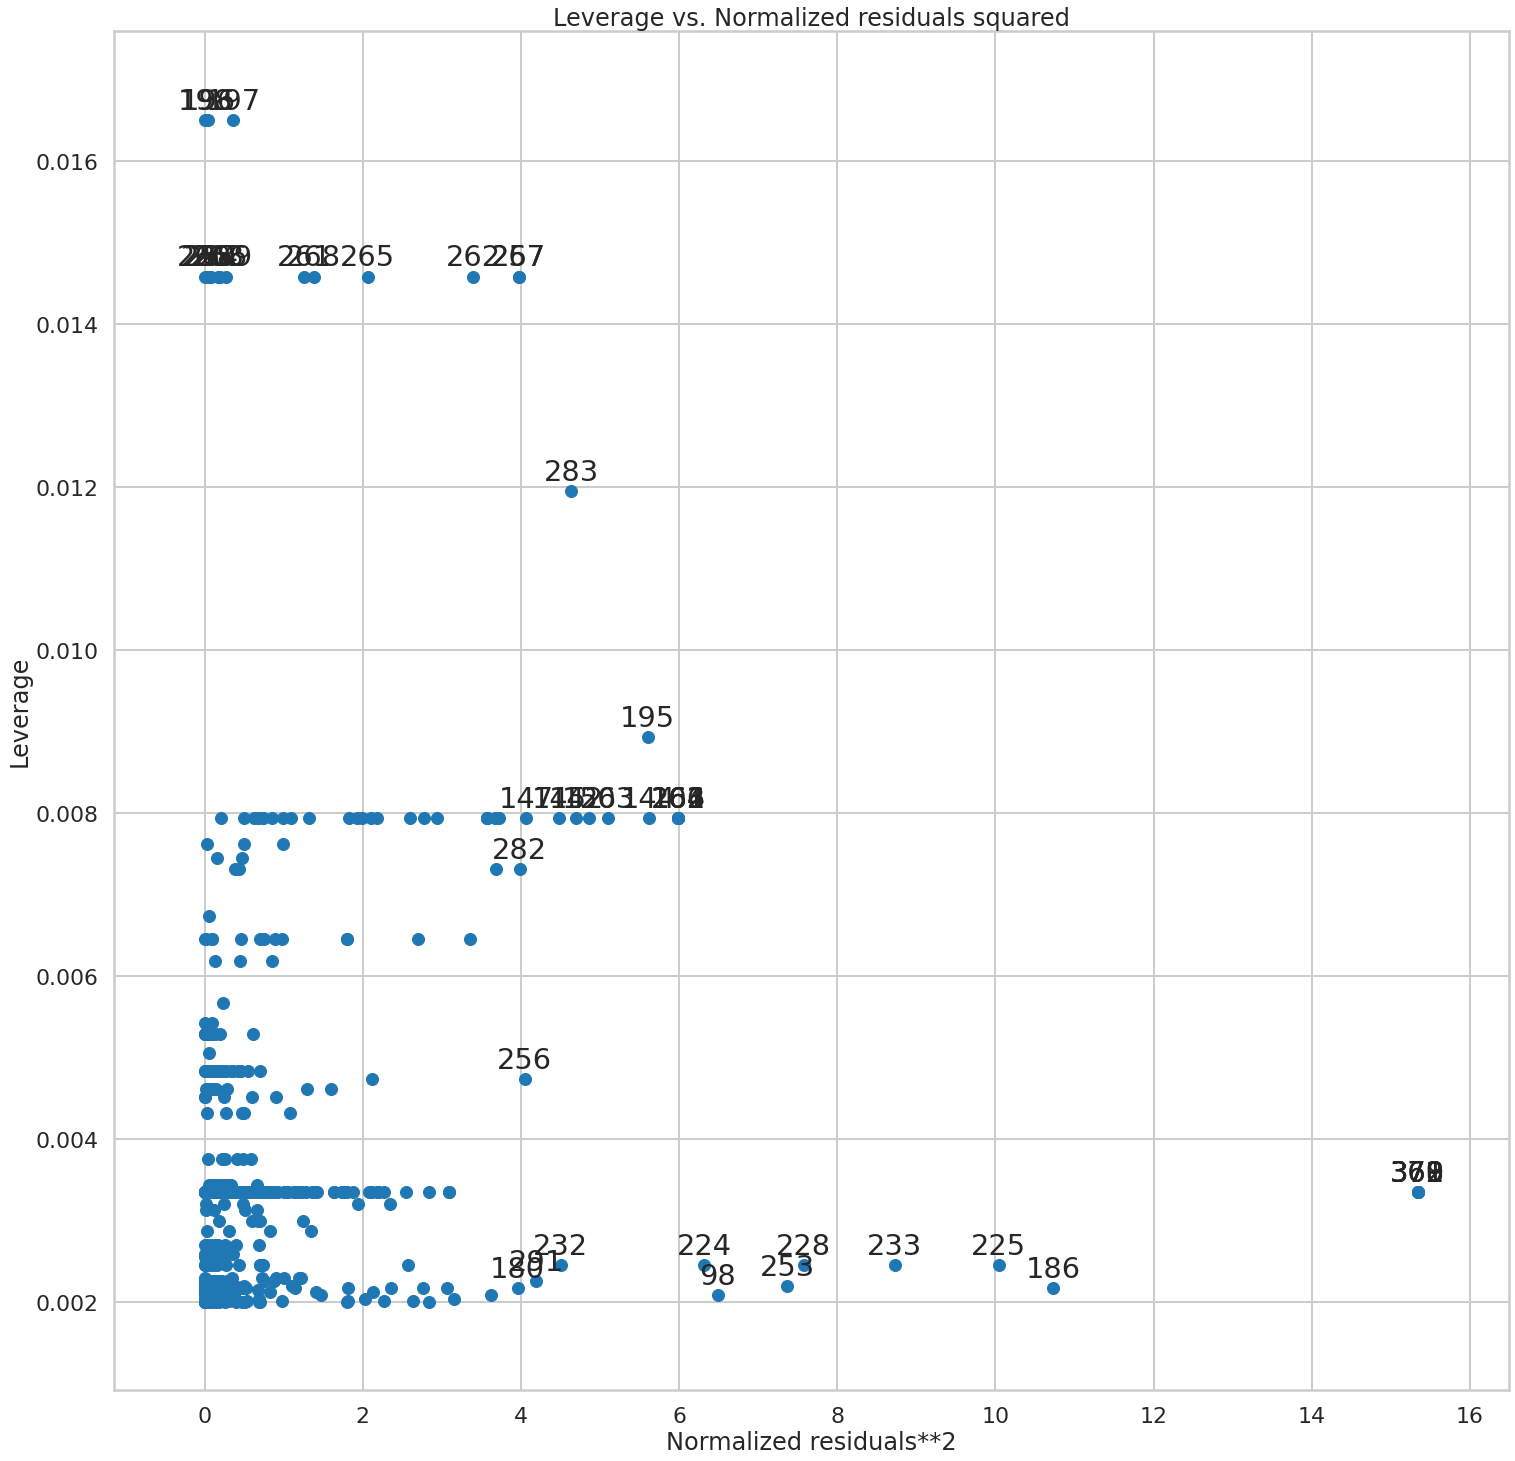

In [40]:
# Your turn.
# Checked with DJ to use the model from part 3 and to use statsmodel
# Pre-work create a model using stats model
import pylab as py
import matplotlib as ml
m1 = ols('PRICE ~ PTRATIO',bos).fit()

print(m1.summary())

# Exercise 1
# Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?

plt.scatter( bos.PRICE, m1.predict(bos.PTRATIO))
plt.xlabel("Original Housing Price")
plt.ylabel("Predicted  Price")
plt.title("Relationship between Price and prediction")
plt.show()

# Exercise 2
# Construct a quantile plot of the residuals. What does the plot tell you?


sm.qqplot(m1.resid,line='45')
sm.qqplot(m1.resid,line='r')
py.show()

# Exercise 3
# What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?
# I read this blog at : https://stats.stackexchange.com/questions/97281/what-does-this-residuals-versus-fitted-plot-mean-about-my-model
# And it does explain what these things mean.  However, I am unable to relate to it in real terms.  Check with DJ

# Exercise 4
# Identify any outliers (if any) in your model and write a story describing what these outliers might represent.
# we can build a routine to identify outliars

# This is done as a part of exercise 6.  What I did was to create a threshold and then get the z-score of items in 
# the dataset.  If the z-score is outside the threshold value, then I consider it an outliar.  However, by removing the outliers
# it appears as if the model has improved marginally.

# Exercise 5
# Construct a leverage plot and identify high leverage points in the model. 
# Write a story explaining possible reasons for the high leverage points.
with ml.rc_context():
    ml.rc("figure", figsize=(25,25))
    sm.graphics.plot_leverage_resid2(m1)


In [42]:
# Exercise 6
# Remove the outliers and high leverage points from your model and run the regression again. How do the results change?

outliers=[]
threshold=2
mean_1 = np.mean(bos.PTRATIO)
std_1 =np.std(bos.PTRATIO)
for ptr in bos.PTRATIO:
        z_score= (ptr - mean_1)/std_1 
        #print(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(ptr)
print(outliers)
print(len(outliers))
# Lets remove the outliers from the dataset
ptratio_price = bos[['PTRATIO', 'RM', 'CRIM','PRICE']]
print(len(ptratio_price))
ptratio_price = ptratio_price[~ptratio_price['PTRATIO'].isin(outliers)]
print(ptratio_price)

m2 = ols('PRICE ~ PTRATIO + CRIM + RM',ptratio_price).fit()

print(m2.summary())
print(m1.summary())

plt.scatter( ptratio_price.PRICE, m2.predict(ptratio_price.PTRATIO))
plt.xlabel("Original Housing Price")
plt.ylabel("Predicted  Price")
plt.title("Relationship between Price and prediction")
plt.show()

plt.scatter( bos.PRICE, m1.predict(bos.PTRATIO))
plt.xlabel("Original Housing Price")
plt.ylabel("Predicted  Price")
plt.title("Relationship between Price and prediction")
plt.show()

# I can see that the outliars in the prediction are now gone and also, r-squared value is smaller.  F-statistic is also smaller

[12.6, 12.6, 12.6, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.6]
16
498
     PTRATIO     RM     CRIM  PRICE
0       15.3  6.575  0.00632   24.0
1       17.8  6.421  0.02731   21.6
2       17.8  7.185  0.02729   34.7
3       18.7  6.998  0.03237   33.4
4       18.7  7.147  0.06905   36.2
..       ...    ...      ...    ...
493     21.0  6.593  0.06263   22.4
494     21.0  6.120  0.04527   20.6
495     21.0  6.976  0.06076   23.9
496     21.0  6.794  0.10959   22.0
497     21.0  6.030  0.04741   11.9

[482 rows x 4 columns]
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     183.1
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           5.11e-79
Time:                        18:24:49   Log-L

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'CRIM' is not defined
    PRICE ~ PTRATIO + CRIM + RM
                      ^^^^